In [0]:
# Import the useful libraries 
import numpy as np
import pandas as pd
import os
from random import randint
import matplotlib.pyplot as plt
from google.colab import files
import time

In [2]:
# Define R Matrix 

R = np.matrix([[0, 0, np.nan, np.nan, 0, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
                [0, 0, 0, np.nan, 0, 0, np.nan, np.nan, np.nan, np.nan, np.nan],
                [np.nan, 0, 0, 0, np.nan, np.nan, 100, np.nan, np.nan, np.nan, np.nan],
                [np.nan, np.nan, 0, 0, np.nan, np.nan, 100, np.nan, np.nan, np.nan, np.nan],
                [0, 0, np.nan, np.nan, 0, 0, np.nan, np.nan, 0, 0, np.nan],
                [np.nan, 0, np.nan, np.nan, 0, 0, 100, 0, np.nan, np.nan, np.nan],
                [np.nan, np.nan, 0, 0, np.nan, 0, 100, 0, np.nan, np.nan, np.nan],
                [np.nan, np.nan, np.nan, np.nan, np.nan, 0, 100, 0, np.nan, np.nan, 0],
                [np.nan, np.nan, np.nan, np.nan, 0, np.nan, np.nan, np.nan, 0, 0, np.nan],
                [np.nan, np.nan, np.nan, np.nan, 0, np.nan, np.nan, np.nan, 0, 0, 0],
                [np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, 0, np.nan, 0, 0]])

print(R)

[[  0.   0.  nan  nan   0.  nan  nan  nan  nan  nan  nan]
 [  0.   0.   0.  nan   0.   0.  nan  nan  nan  nan  nan]
 [ nan   0.   0.   0.  nan  nan 100.  nan  nan  nan  nan]
 [ nan  nan   0.   0.  nan  nan 100.  nan  nan  nan  nan]
 [  0.   0.  nan  nan   0.   0.  nan  nan   0.   0.  nan]
 [ nan   0.  nan  nan   0.   0. 100.   0.  nan  nan  nan]
 [ nan  nan   0.   0.  nan   0. 100.   0.  nan  nan  nan]
 [ nan  nan  nan  nan  nan   0. 100.   0.  nan  nan   0.]
 [ nan  nan  nan  nan   0.  nan  nan  nan   0.   0.  nan]
 [ nan  nan  nan  nan   0.  nan  nan  nan   0.   0.   0.]
 [ nan  nan  nan  nan  nan  nan  nan   0.  nan   0.   0.]]


In [3]:
# Initialise Q Matrix 
Q = np.matrix(np.zeros([11,11]))

print(Q)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [0]:
# Q-learning algorithm

def q_learning(alpha, gamma, epsilon, decay):
    
  # initialise current state in random
  current_state = randint(0, 10)
  
  # check available actions in the current state
  current_state_row = R[current_state,]
  av_act = np.where(current_state_row >= 0)[1]
  
  # if Q-matrix is 0, select random, else follow epsilon greedy policy
  if Q[current_state, :].sum() == 0:
    action = np.random.choice(av_act, size=1)
  
  else:
    if np.random.uniform(0,1) < epsilon:
      action = np.random.choice(av_act, size=1)
    else:
      action = np.argmax(Q[current_state, :])
    
  # find max Q value after action
  next_state_row = R[action,]
  next_av_act = np.where(next_state_row >= 0)[1]
  
  if Q[action, :].sum() == 0:
    next_action = np.random.choice(next_av_act, size=1)
  
  else:
    next_action = np.argmax(Q[action, :])
  
  # update Q-matrix
  Q[current_state, action] = Q[current_state, action] + alpha * (R[current_state, action] + gamma * Q[action, next_action] - Q[current_state, action])
  
  # return Q-matrix and number of steps
  return Q, alpha, gamma, epsilon, decay 

In [0]:
def evaluate(Q, episode, alpha, gamma, epsilon, decay):
  
  # initiate current state
#   current_state = randint(0,10)
  current_state = 8
  steps = [current_state]
  reward = 0
  
  # set rule if initiated from Station 7
  if current_state == 6:
    reward += np.max(Q[current_state, :])
  
  # step for start from other stations
  else:
    while current_state != 6:
      
      # check available actions 
      current_state_row = R[current_state, :]
      av_act = np.where(current_state_row >= 0)[1]
      
      # when Q-matrix is 0, select randomly from available actions
      if Q[current_state, av_act].sum() == 0:
        next_step = int(np.random.choice(av_act, size=1))
      
      # when Q-matrix is not 0, select the best action or one of the best actions
      else:
        
        # index for maximum value
        max_index = np.where(Q[current_state,:] == np.max(Q[current_state, av_act]))[1]
        
        # if more than 1 max value, randomly choose one; otherwise, choose the max value
        if max_index.shape[0] > 1:
          next_step = int(np.random.choice(max_index, size = 1))
        else:
          next_step = int(max_index)
      
      # append next action and reward
      next_reward = np.max(Q[current_state, next_step])
      
      steps.append(next_step)
      reward += next_reward
      current_state = next_step
      
  
  average_reward.append((episode, alpha, gamma, epsilon, decay, reward/len(steps)))  
  step_cont.append((episode, alpha, gamma, epsilon, decay, len(steps)))
  
  return average_reward, step_cont, steps

In [0]:
# Define initial parameters 
alpha = 0.9 # alpha is the learning rate
gamma = 0.8 # gamma is the discount factor 
epsilon = 0.9 # epsilon is the exploration factor
decays = [0.5, 0.7, 0.9, 0.99, 0.999] # df is the decay factor for epsilon


In [7]:
average_reward = []
step_cont = []
all_steps = []
# optimal = []
all_q = []

start = time.time()

for decay in decays:
  for episode in range(1000):
    Q, alpha, gamma, epsilon, decay = q_learning(alpha, gamma, epsilon, decay)
    
    if np.matrix.max(Q) > 0:
      Q_norm = (Q/np.matrix.max(Q)*100)
    else:
      Q_norm = Q

#     optimal.append((episode, alpha, gamma, epsilon, decay, ((Q_norm[8,4]+Q_norm[4,5]+Q_norm[5,6])/4)))

    average_reward, step_cont, steps = evaluate(Q_norm, episode, alpha, gamma, epsilon, decay)
  
    all_q.append(Q_norm)
    
    epsilon *= decay
          
    all_steps.append(steps)

  # Set Q-matrix and epsilon to initial value
  Q = np.matrix(np.zeros([11,11]))
  epsilon = 0.9
          
end = time.time()
                  
print(Q_norm.astype(int))
# print(average_reward)
# print(step_cont)
print('Time used :', end-start, 'seconds')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in greater_equal
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in greater_equal
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in greater_equal


[[ 51  63   0   0  63   0   0   0   0   0   0]
 [ 51  63  79   0  63  79   0   0   0   0   0]
 [  0  63  79  79   0   0 100   0   0   0   0]
 [  0   0  79  79   0   0  99   0   0   0   0]
 [ 51  63   0   0  63  79   0   0  51  49   0]
 [  0  63   0   0  61  79  99  79   0   0   0]
 [  0   0  79  79   0  79  99  79   0   0   0]
 [  0   0   0   0   0  79  99  79   0   0  63]
 [  0   0   0   0  63   0   0   0  51  51   0]
 [  0   0   0   0  63   0   0   0  51  51  63]
 [  0   0   0   0   0   0   0  79   0  51  63]]
Time used : 3.1985902786254883 seconds


In [22]:
Q_ = all_q[4000]
Q_ = (Q_/np.matrix.max(Q_)*100)
Q_.astype(int)

matrix([[ 51,  63,   0,   0,  63,   0,   0,   0,   0,   0,   0],
        [ 51,  63,  79,   0,  63,  79,   0,   0,   0,   0,   0],
        [  0,  63,  79,  79,   0,   0, 100,   0,   0,   0,   0],
        [  0,   0,  79,  79,   0,   0,  99,   0,   0,   0,   0],
        [ 51,  63,   0,   0,  63,  79,   0,   0,  51,  49,   0],
        [  0,  63,   0,   0,  61,  79,  99,  79,   0,   0,   0],
        [  0,   0,  79,  79,   0,  79,  99,  79,   0,   0,   0],
        [  0,   0,   0,   0,   0,  79,  99,  79,   0,   0,  63],
        [  0,   0,   0,   0,  63,   0,   0,   0,  51,  51,   0],
        [  0,   0,   0,   0,  63,   0,   0,   0,  51,  51,  63],
        [  0,   0,   0,   0,   0,   0,   0,  79,   0,  51,  63]])

In [9]:
df_reward = pd.DataFrame.from_records(average_reward, columns = ['episode', 'alpha', 'gamma', 'epsilon', 'decay', 'Average Reward Per Step'])
df_step = pd.DataFrame.from_records(step_cont, columns = ['episode', 'alpha', 'gamma', 'epsilon', 'decay','Steps'])

df = pd.merge(df_reward, df_step, on=['episode', 'alpha', 'gamma', 'epsilon', 'decay'])
print(df.shape)
df.head(5)

(5000, 7)


,episode,alpha,gamma,epsilon,decay,Average Reward Per Step,Steps
0,0,0.9,0.8,0.90000,0.5,0.000000,12
1,1,0.9,0.8,0.45000,0.5,0.000000,25
2,2,0.9,0.8,0.22500,0.5,0.000000,13
3,3,0.9,0.8,0.11250,0.5,0.000000,15
4,4,0.9,0.8,0.05625,0.5,1.851852,54


In [0]:
# df.to_excel('grid_search_decay.xlsx')
# files.download('grid_search_decay.xlsx')

In [0]:
df_001 = df[df['decay'] == 0.5]
df_001_1 = df_001.rename(columns={'Average Reward Per Step': 'decay=0.5'})
df_001_2 = df_001.rename(columns={'Steps': 'decay=0.5'})

df_01 = df[df['decay'] == 0.7]
df_01_1 = df_01.rename(columns={'Average Reward Per Step': 'decay=0.7'})
df_01_2 = df_01.rename(columns={'Steps': 'decay=0.7'})

df_05 = df[df['decay'] == 0.9]
df_05_1 = df_05.rename(columns={'Average Reward Per Step': 'decay=0.9'})
df_05_2 = df_05.rename(columns={'Steps': 'decay=0.9'})

df_09 = df[df['decay'] == 0.99]
df_09_1 = df_09.rename(columns={'Average Reward Per Step': 'decay=0.99'})
df_09_2 = df_09.rename(columns={'Steps': 'decay=0.99'})

df_1 = df[df['decay'] == 0.999]
df_1_1 = df_1.rename(columns={'Average Reward Per Step': 'decay=0.999'})
df_1_2 = df_1.rename(columns={'Steps': 'decay=0.999'})

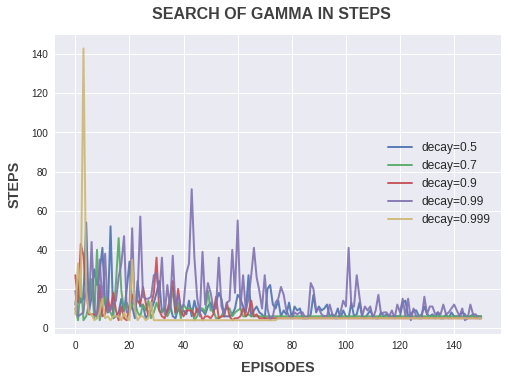

In [12]:
plt.style.use('seaborn')

fig, ax = plt.subplots()

ax.plot(df_001_2['episode'][df_001['episode']<=150], df_001_2['decay=0.5'][df_001['episode']<=150], linewidth=2, alpha=0.9)
ax.plot(df_01_2['episode'][df_01['episode']<=150], df_01_2['decay=0.7'][df_01['episode']<=150], linewidth=2, alpha=0.9)
ax.plot(df_05_2['episode'][df_05['episode']<=150], df_05_2['decay=0.9'][df_05['episode']<=150], linewidth=2, alpha=0.9)
ax.plot(df_09_2['episode'][df_09['episode']<=150], df_09_2['decay=0.99'][df_09['episode']<=150], linewidth=2, alpha=0.9)
ax.plot(df_1_2['episode'][df_1['episode']<=150], df_1_2['decay=0.999'][df_1['episode']<=150], linewidth=2, alpha=0.9)

fig.suptitle('SEARCH OF GAMMA IN STEPS', color='#404040', fontsize=16, y=0.95, fontweight='bold')
ax.set_xlabel('EPISODES', color='#404040', fontsize='large', fontweight='bold', labelpad=10)
ax.set_ylabel('STEPS', color='#404040', fontsize='large', fontweight='bold', labelpad=10)

# plt.text(100, 39, r'$\alpha=0.9$, $\gamma=0.8, $\epsilon=0.1$')
ax.legend(loc='right', fontsize='medium')

plt.show()

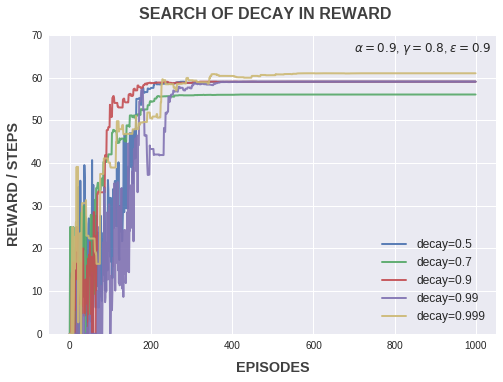

In [13]:
plt.style.use('seaborn')

fig, ax = plt.subplots()

ax.plot(df_001_1['episode'], df_001_1['decay=0.5'], linewidth=2, alpha=0.9)
ax.plot(df_01_1['episode'], df_01_1['decay=0.7'], linewidth=2, alpha=0.9)
ax.plot(df_05_1['episode'], df_05_1['decay=0.9'], linewidth=2, alpha=0.9)
ax.plot(df_09_1['episode'], df_09_1['decay=0.99'], linewidth=2, alpha=0.9)
ax.plot(df_1_1['episode'], df_1_1['decay=0.999'], linewidth=2, alpha=0.9)

fig.suptitle('SEARCH OF DECAY IN REWARD', color='#404040', fontsize=16, y=0.95, fontweight='bold')
ax.set_xlabel('EPISODES', color='#404040', fontsize='large', fontweight='bold', labelpad=10)
ax.set_ylabel('REWARD / STEPS', color='#404040', fontsize='large', fontweight='bold', labelpad=10)

plt.text(700, 66, r'$\alpha=0.9$, $\gamma=0.8$, $\epsilon=0.9$')
ax.legend(loc='lower right', fontsize='medium')

ax.set_ylim(0, 70)

plt.show()

In [14]:
df_stats = df[['decay','Steps']]
df_stats.head(5)

,decay,Steps
0,0.5,12
1,0.5,25
2,0.5,13
3,0.5,15
4,0.5,54


In [15]:
df_stats_1 = df_stats.groupby(['decay']).describe().round(decimals=1)
df_stats_1

Steps                                     
        count mean  std  min  25%  50%  75%    max
decay                                             
0.500  1000.0  5.9  3.6  5.0  5.0  5.0  5.0   54.0
0.700  1000.0  6.3  2.3  4.0  6.0  6.0  6.0   46.0
0.900  1000.0  5.4  2.6  4.0  5.0  5.0  5.0   43.0
0.990  1000.0  6.5  6.0  4.0  5.0  5.0  5.0   71.0
0.999  1000.0  4.4  4.7  4.0  4.0  4.0  4.0  143.0

In [20]:
df_stats_2 = df_stats_1.drop(columns=['count'], level=1, axis=1)
df_stats_2

Steps                         
       mean  std  min  25%  50%  75%
decay                               
0.500   5.9  3.6  5.0  5.0  5.0  5.0
0.700   6.3  2.3  4.0  6.0  6.0  6.0
0.900   5.4  2.6  4.0  5.0  5.0  5.0
0.990   6.5  6.0  4.0  5.0  5.0  5.0
0.999   4.4  4.7  4.0  4.0  4.0  4.0